In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load the Titanic dataset
dataset_titan ="C:/Users/DELL/Downloads/archive (1)/Titanic-Dataset.csv" 
titanic_df = pd.read_csv(dataset_titan)

# Explore the first few rows of the data
print("First few rows of the dataset:")
print(titanic_df.head())


First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [2]:
# Explore data types
print("\nData types:")
print(titanic_df.dtypes)




Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# Check for missing values
print("\nMissing values:")
print(titanic_df.isnull().sum())



Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


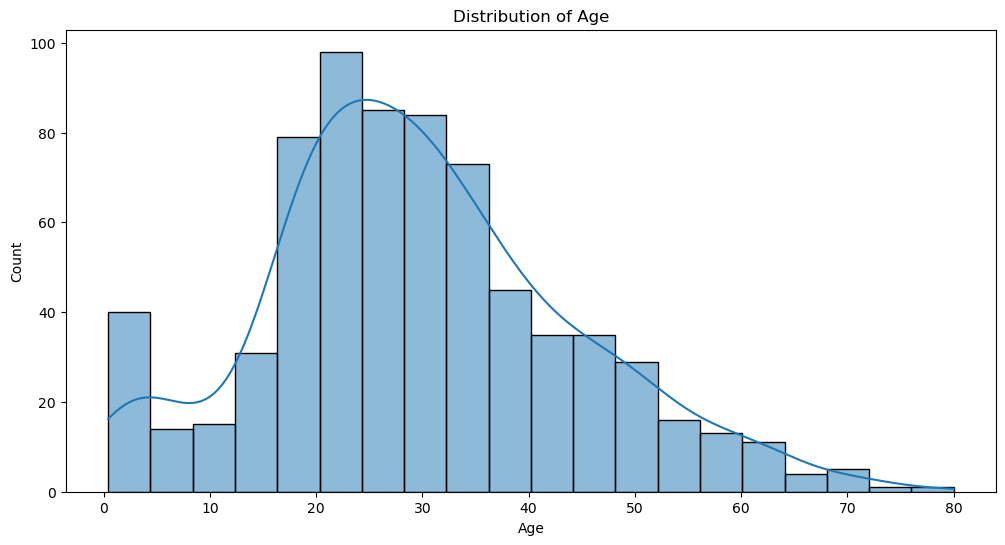

In [4]:
# Plot distributions of key features
plt.figure(figsize=(12, 6))
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()




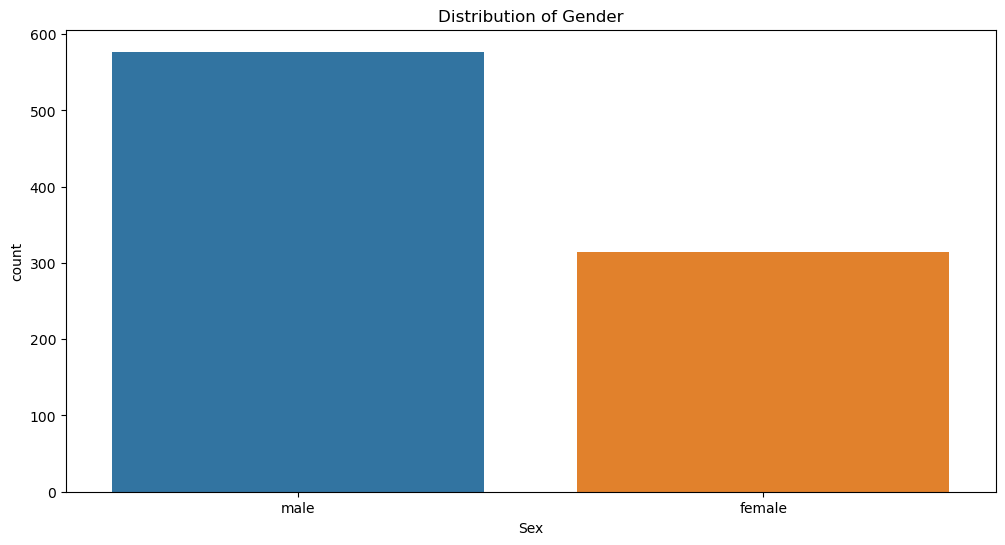

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', data=titanic_df)
plt.title('Distribution of Gender')
plt.show()

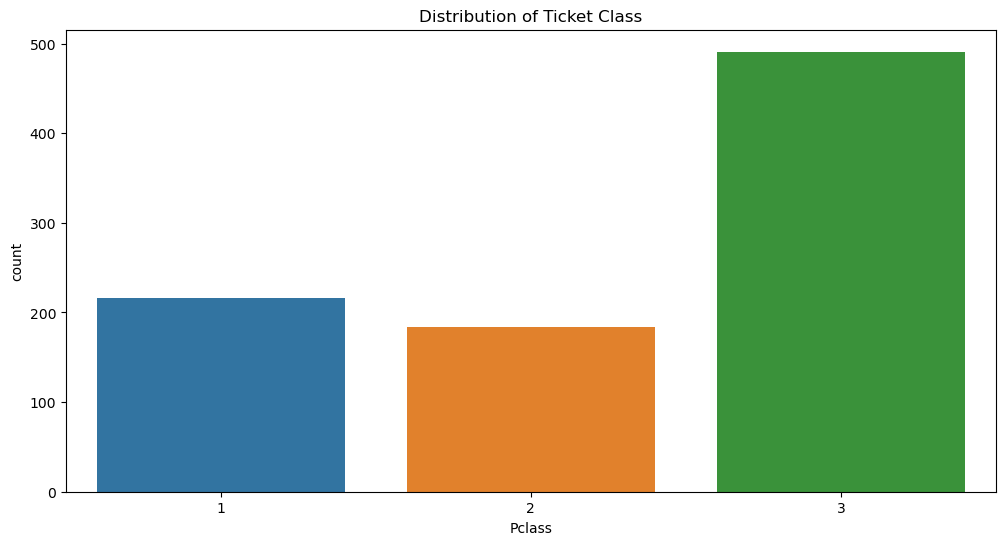

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Distribution of Ticket Class')
plt.show()

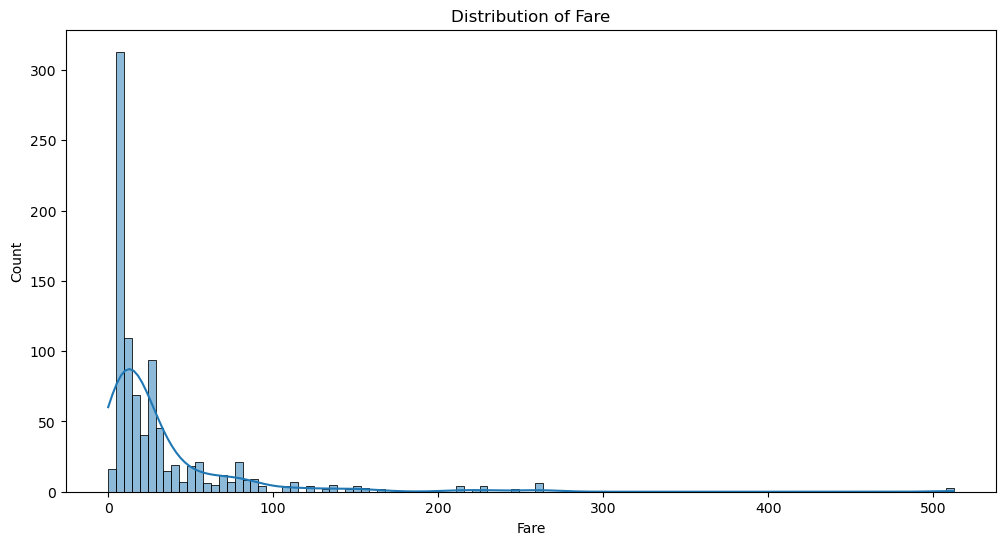

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

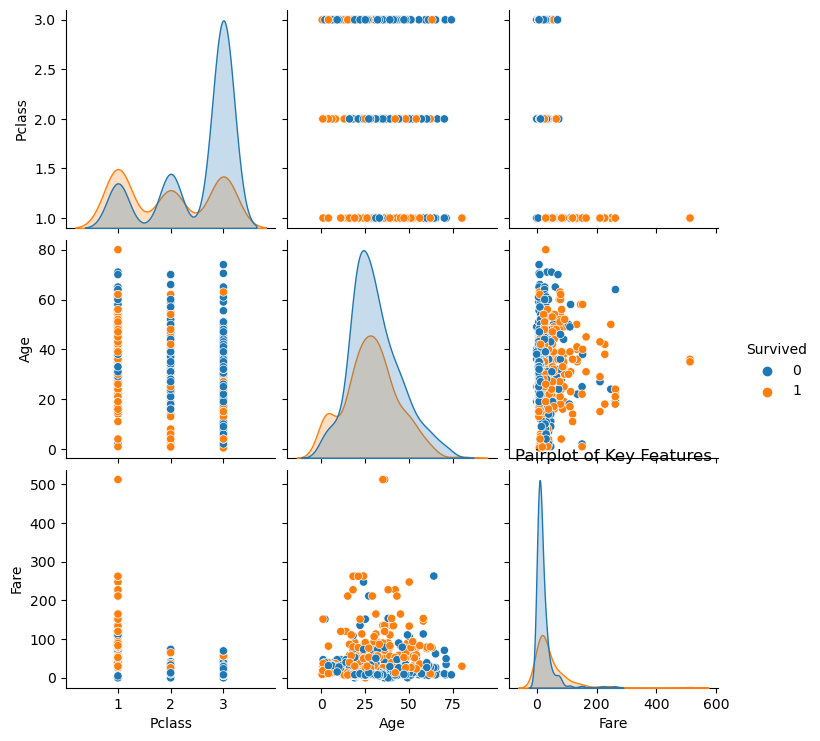

In [8]:
# Plot pairplot of key features to identify relationships
sns.pairplot(titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.title('Pairplot of Key Features')
plt.show()


In [9]:
# Data preprocessing
# Fill missing values in the 'Age' column with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the most frequent value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Fill missing values in the 'Fare' column with the median fare
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

titanic_df['Cabin'].fillna(0, inplace=True)

titanic_df['Sex'].replace({'female': 0, 'male': 1},inplace=True)


print(titanic_df.isnull().sum())




PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [10]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_df[features]
y = titanic_df['Survived']

# One-hot encode the 'Embarked' column
X = pd.get_dummies(X, columns=['Embarked'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a scaler and a logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")




Model Evaluation:
Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76


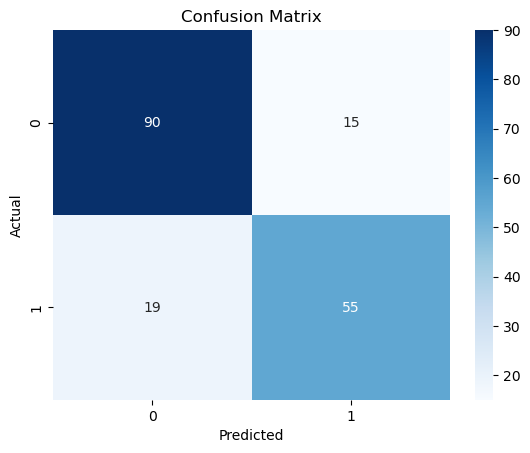

In [11]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



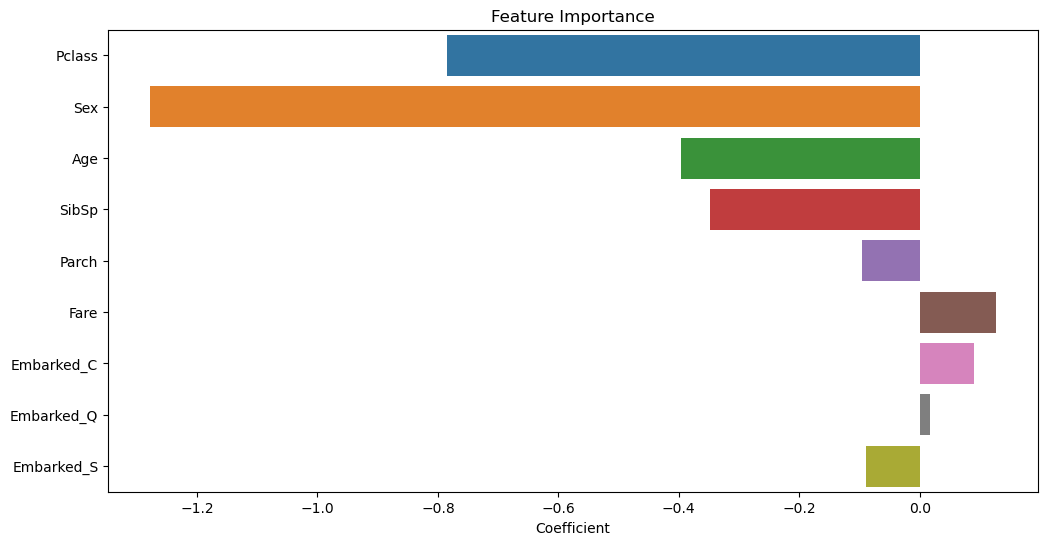

In [13]:
# Feature importance visualization
# Since logistic regression does not provide feature importance directly, we can use the coefficients as a proxy
coefficients = pipeline.named_steps['model'].coef_[0]
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients, y=features)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.show()
